In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load train & test files

In [4]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


Set key parameters

In [5]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train_data/train'
validation_data_dir = 'train_data/train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on top of a pretrained VGG

In [6]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

In [7]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [8]:
for layer in model.layers[:10]:
    layer.traiable = False

In [11]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(learning_rate= 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

Data Augumentation

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [14]:
history = model_final.fit(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.2993 - loss: 1.5967 

C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3123 - loss: 1.5592 - val_accuracy: 0.7750 - val_loss: 0.5026
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6875 - loss: 0.6603 - val_accuracy: 0.5000 - val_loss: 1.2662
Epoch 3/15


C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7873 - loss: 0.4016 - val_accuracy: 0.9000 - val_loss: 0.2742
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.2245 - val_accuracy: 1.0000 - val_loss: 0.2364
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 989ms/step - accuracy: 0.9421 - loss: 0.2493 - val_accuracy: 0.8875 - val_loss: 0.2594
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.1328 - val_accuracy: 0.7500 - val_loss: 0.2375
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 987ms/step - accuracy: 0.9401 - loss: 0.1597 - val_accuracy: 0.9312 - val_loss: 0.1915
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2665 - val_accuracy: 1.0000 - val_loss: 0.0509
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9674 - loss: 0.1561 - val_accuracy: 0.9187 - val_loss: 0.2035
Epoch 10/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0952 - val_accuracy: 1.0000 - val_loss:

In [15]:
history.history

{'accuracy': [0.48249998688697815,
  0.6875,
  0.8349999785423279,
  0.96875,
  0.9424999952316284,
  0.9375,
  0.9474999904632568,
  0.90625,
  0.9663461446762085,
  1.0,
  0.9649999737739563,
  0.96875,
  0.9700000286102295,
  0.90625,
  0.9700000286102295],
 'loss': [1.0729663372039795,
  0.6602761149406433,
  0.347080796957016,
  0.2244778573513031,
  0.22683395445346832,
  0.13277733325958252,
  0.16258695721626282,
  0.26653486490249634,
  0.14420396089553833,
  0.09522110223770142,
  0.11166219413280487,
  0.13154609501361847,
  0.09150490909814835,
  0.2564757466316223,
  0.08663488179445267],
 'val_accuracy': [0.7749999761581421,
  0.5,
  0.8999999761581421,
  1.0,
  0.887499988079071,
  0.75,
  0.9312499761581421,
  1.0,
  0.918749988079071,
  1.0,
  0.90625,
  1.0,
  0.9375,
  1.0,
  0.9125000238418579],
 'val_loss': [0.5026085376739502,
  1.2661983966827393,
  0.27422553300857544,
  0.23640047013759613,
  0.2594083547592163,
  0.2374664545059204,
  0.19151587784290314,
  0.

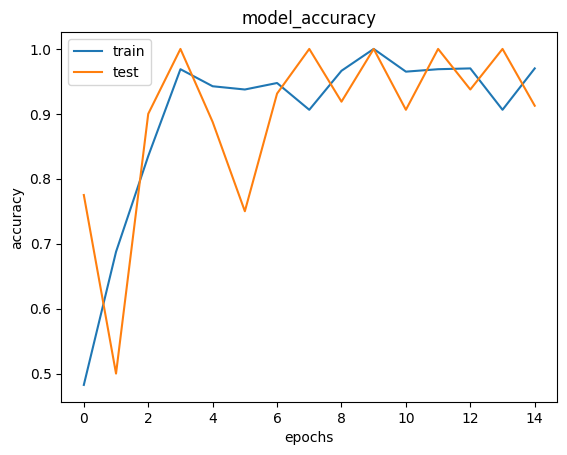

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

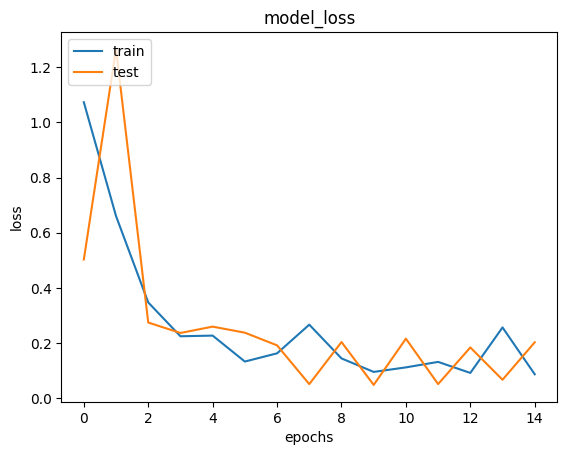

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [18]:
model_final.save('model_final.h5')

In [19]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [20]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [21]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [23]:
make_prediction("train_data/train_data/train/occupied/roi_1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


'car'

In [28]:
make_prediction("spot169.jpg")

1/1 [==============================] - 0s 53ms/step


'no_car'

In [29]:
model_final.save("model_final.h5")